![This is an image](https://letsgrowmore.in/wp-content/uploads/2021/05/growmore-removebg-preview.png)
## ***Virtual Internship Program***
***Data Science  Tasks***
### ***Author: JEEVAA***

# ***INTERMEDIATE LEVEL TASK***
### Task 6 -Prediction using Decision Tree  Algorithm 
create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

Dataset : https://bit.ly/3kXTdox


In [1]:
# Importing required libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

In [2]:
# Importing the dataset as pandas Dataframe
iris = pd.read_csv("c:/GRIP/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


We will separate Species and features columns for the purpose for training the model

In [3]:
species = iris['Species'] # Saving Species columns' value as species
df = iris.drop(columns=['Id', 'Species']) # Remove Id and Species column from df
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
from sklearn.model_selection import train_test_split # To split the data into parts for training and testing
from sklearn import metrics # For model evaluation

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, species, test_size = 0.2, random_state = 30) 
# Split data into train and test section

In [6]:
dt = DecisionTreeClassifier() 
dt.fit(X_train, y_train) # Fitting the data into DecisionTreeClassifier

DecisionTreeClassifier()

In [7]:
y_pred = dt.predict(X_test) # Predicting the value of Target variable for X_test.

In [8]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred,) # Generating Confusion Matrix
cf_matrix

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  1,  8]], dtype=int64)

The confusion matrix shows that we got only 1 incorrect prediction out of 30.

In [9]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred)) # Checking the Accuracy of model.

Accuracy: 0.9333333333333333


The model's accuracy seems to very good.

<AxesSubplot:>

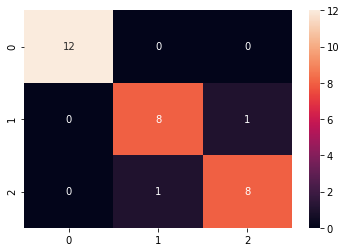

In [10]:
sns.heatmap(cf_matrix, annot=True) # Heatmap of Confusion Matrix for better visualisation

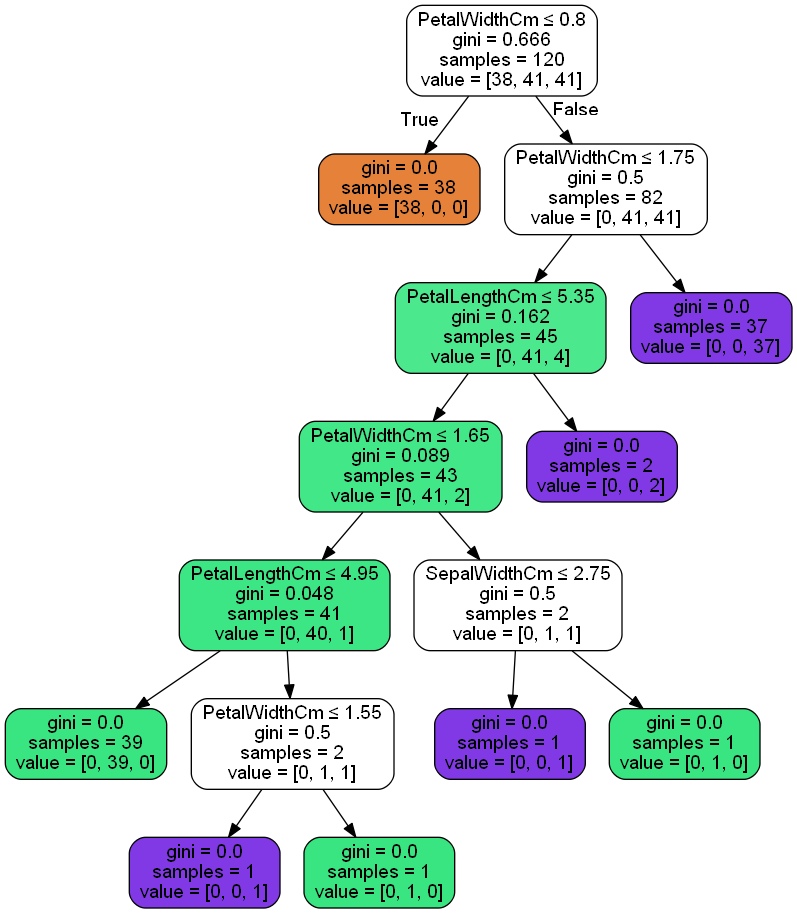

In [11]:
# Generating the Decision Tree made by model as image.
import graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,feature_names=df.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graphviz.Source(graph)  
Image(graph.create_png())

### We can now feed any data to the model to predict it's species.

In [12]:
X_train[X_train['PetalWidthCm']<=0.8].shape[0]

38

Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 4.7cm, 3.2cm, 2.1cm and 0.2cm respectively



In [13]:
dt.predict([[4.7, 3.2, 2.1, 0.2]])

array(['Iris-setosa'], dtype=object)

Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 7cm, 3.2cm, 4.7cm and 1.4cm respectively

In [14]:
dt.predict([[7, 3.2, 4.7, 1.4]])

array(['Iris-versicolor'], dtype=object)

Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 5.8cm, 2.7cm, 5.1cm and 1.9cm respectively

In [15]:
dt.predict([[5.8, 2.7, 5.1, 1.9]])

array(['Iris-virginica'], dtype=object)

## Thank you